<h1><Br> NAMA : DENI PRIYADI
<h1> NIM :191410038
<h1> ALAMAT : KABUPATEN MAJALENGKA


<h1>Menyambungkan ke penyimpanan google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<h1> IMPORT LIBRARY YANG DIBUTUHKAN

In [ ]:
import zipfile
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

<h1> EKSTRAK DATASET YANG BERASAL DARI GOOGLE DRIVE

<p> Dataset dapat diunduh melalui link di berikut : https://drive.google.com/file/d/1H1Ore50nTq8bYu23HBTFrJl2z6ONUR-G/view?usp=sharing

In [ ]:
Target_file = '/content/drive/MyDrive/DICODING/DATASET/emotion.zip'

extracting = zipfile.ZipFile (Target_file, 'r')
extracting.extractall('/content/drive/MyDrive/DICODING/DATASET/emotion')
extracting.close()

<h1>MENGUBAH DATASET BERBENTUK CSV MENJADI SEBUAH DATAFRAME


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DICODING/DATASET/emotion/Emotion_classify_Data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5937 entries, 0 to 5936
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  5937 non-null   object
 1   Emotion  5937 non-null   object
dtypes: object(2)
memory usage: 92.9+ KB


In [ ]:
df.head()

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear


In [ ]:
df.tail()

,Comment,Emotion
5932,i begun to feel distressed for you,fear
5933,i left feeling annoyed and angry thinking that...,anger
5934,i were to ever get married i d have everything...,joy
5935,i feel reluctant in applying there because i w...,fear
5936,i just wanted to apologize to you because i fe...,anger


<h1> ONE HOT ENCODING


In [ ]:
kategori = pd.get_dummies(df.Emotion)
new_df = pd.concat([df, kategori], axis = 1)

In [ ]:
new_df.head()

,Comment,Emotion,anger,fear,joy
0,i seriously hate one subject to death but now ...,fear,0,1,0
1,im so full of life i feel appalled,anger,1,0,0
2,i sit here to write i start to dig out my feel...,fear,0,1,0
3,ive been really angry with r and i feel like a...,joy,0,0,1
4,i feel suspicious if there is no one outside l...,fear,0,1,0


In [ ]:
new_df = new_df.drop(columns = 'Emotion')
new_df

,Comment,anger,fear,joy
0,i seriously hate one subject to death but now ...,0,1,0
1,im so full of life i feel appalled,1,0,0
2,i sit here to write i start to dig out my feel...,0,1,0
3,ive been really angry with r and i feel like a...,0,0,1
4,i feel suspicious if there is no one outside l...,0,1,0
...,...,...,...,...
5932,i begun to feel distressed for you,0,1,0
5933,i left feeling annoyed and angry thinking that...,1,0,0
5934,i were to ever get married i d have everything...,0,0,1
5935,i feel reluctant in applying there because i w...,0,1,0


<h1>MEMISAHKAN ATRIBUT DENGAN LABEL

In [ ]:
x = new_df['Comment'].values
y = new_df[['anger', 'fear', 'joy']].values

<h1> SPLIT DATASET
<p> Dataset menggunakan ratio 8:2 di mana untuk data train sebesar 80% dan untuk validasinya sebesar 20%

In [ ]:
x_train, X_test, y_train, Y_test = train_test_split(x, y, test_size = 0.2)

<h1>TOKENISASI TEKS


In [ ]:
tokenizer = Tokenizer(num_words = 10000, oov_token ='<OOV>')
tokenizer.fit_on_texts(x_train)

<h1> TOKENISASI TO SEQUENCE

In [ ]:
s_train = tokenizer.texts_to_sequences(x_train)
s_test = tokenizer.texts_to_sequences(X_test)

<h1> PADDING TEKS

In [ ]:
pad_train = pad_sequences(s_train,
                          maxlen = 50)
pad_test = pad_sequences(s_test,
                         maxlen = 50)

<h1> ARSITEKTUR MODEL

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=10000,output_dim=16),
    tf.keras.layers.LSTM(128, dropout = 0.2 , recurrent_dropout= 0.2),
    tf.keras.layers.Dense(3,  activation = 'softmax')
])

In [ ]:
model.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_34 (Embedding)    (None, None, 16)          160000    
                                                                 
 lstm_34 (LSTM)              (None, 128)               74240     
                                                                 
 dense_155 (Dense)           (None, 3)                 387       
                                                                 
Total params: 234627 (916.51 KB)
Trainable params: 234627 (916.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<h1> FUNGSI CALLBACKS

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch,logs= {}):
    if(logs.get('accuracy') >= 0.95):
      print ("accuracy sudah mencapai 95%")
      self.model.stop_training = True

In [ ]:
model.compile (loss = 'categorical_crossentropy',
               optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001),
               metrics = ['accuracy'])

<h1> Latih Model

In [ ]:
history = model.fit (
    pad_train,
    y_train,
    epochs=25,
    validation_data= (pad_test, Y_test),
    verbose = 2,
    batch_size = 128,
    callbacks = [myCallback()]
)

Epoch 1/25
38/38 - 13s - loss: 1.0990 - accuracy: 0.3319 - val_loss: 1.0973 - val_accuracy: 0.3569 - 13s/epoch - 352ms/step
Epoch 2/25
38/38 - 9s - loss: 1.0965 - accuracy: 0.3660 - val_loss: 1.0934 - val_accuracy: 0.4478 - 9s/epoch - 239ms/step
Epoch 3/25
38/38 - 8s - loss: 1.0823 - accuracy: 0.4649 - val_loss: 1.1935 - val_accuracy: 0.3426 - 8s/epoch - 199ms/step
Epoch 4/25
38/38 - 9s - loss: 1.0324 - accuracy: 0.5167 - val_loss: 0.9744 - val_accuracy: 0.5783 - 9s/epoch - 244ms/step
Epoch 5/25
38/38 - 7s - loss: 0.9081 - accuracy: 0.6239 - val_loss: 0.9040 - val_accuracy: 0.6271 - 7s/epoch - 172ms/step
Epoch 6/25
38/38 - 9s - loss: 0.7603 - accuracy: 0.7147 - val_loss: 0.8590 - val_accuracy: 0.5774 - 9s/epoch - 240ms/step
Epoch 7/25
38/38 - 6s - loss: 0.5898 - accuracy: 0.8031 - val_loss: 0.6936 - val_accuracy: 0.7104 - 6s/epoch - 161ms/step
Epoch 8/25
38/38 - 9s - loss: 0.4499 - accuracy: 0.8585 - val_loss: 0.5021 - val_accuracy: 0.8350 - 9s/epoch - 226ms/step
Epoch 9/25
38/38 - 6s 

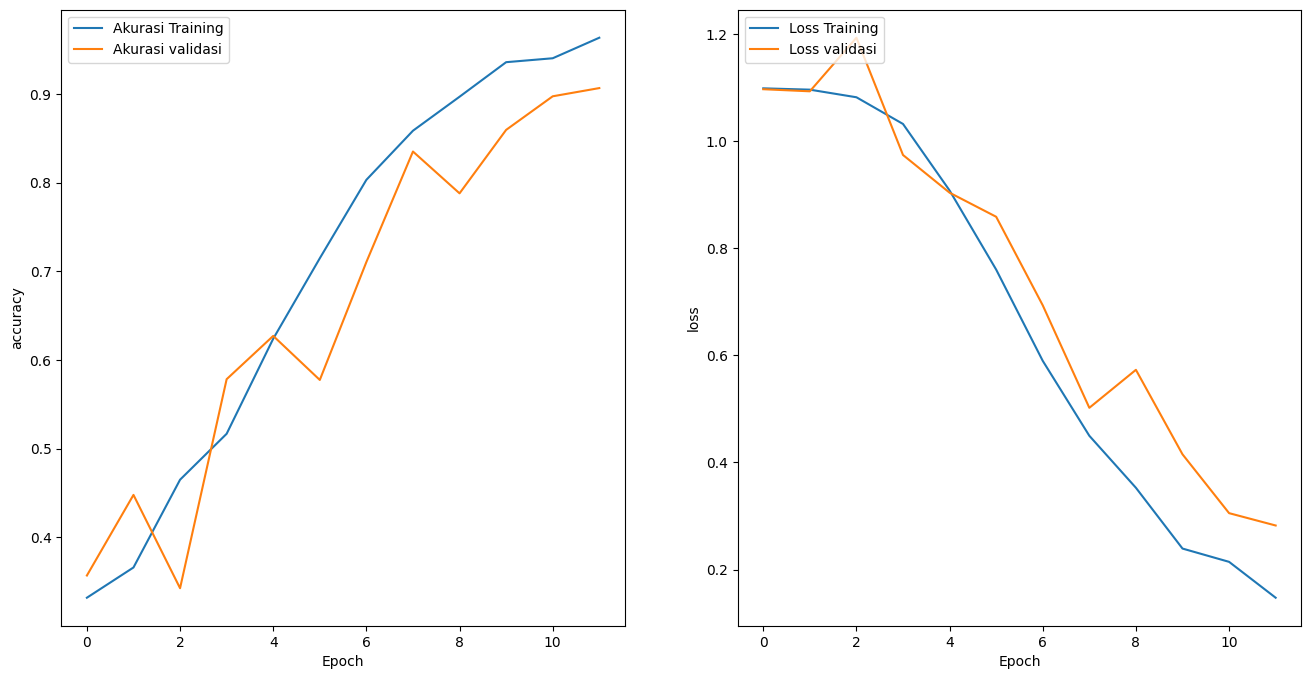

In [ ]:
%matplotlib inline

import matplotlib.image as mimg
import matplotlib.pyplot as plt

acc = (history.history['accuracy'])
val_acc = (history.history['val_accuracy'])
loss = (history.history['loss'])
val_loss = (history.history['val_loss'])

plt.figure(figsize = (16,8))
plt.subplot(1,2,1)

plt.plot(acc, label = 'Akurasi Training')
plt.plot(val_acc, label = 'Akurasi validasi')
plt.title = ('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(loc = 'upper left')

plt.subplot(1,2,2)
plt.plot(loss, label = 'Loss Training')
plt.plot(val_loss, label = 'Loss validasi')
plt.title = ('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc = 'upper left')

plt.show()